## Time Series Regression Models.
The basic concept is that we forecast the time series of interest *y* assuming that it has a linear relationship with other time series *x*.<br>
**Example 1:** <br>
One may wish to **predict monthly sales** *(y)* using total advertising spend *x* as a predictor.<br>

**Example 2:**<br>
**Forecast daily electricity demand** *(y)* using temperature *x1* and the day of the week *x2* as predictors.<br>

***Note*:**<br>
- The *forecast variable (y)* is sometimes called the *regressand, dependent* or *explained variable*. <br>
- The *predictor variables (x)* are sometimes called *regressors, independent* or *explanatory variables*.

There are several types of Time Series Regression Models, some common ones include:<br>
- #### Autoregressive Integrated Moving Average (ARIMA)
ARIMA is a popular model used to forecast future values of a time series based on its own past values. It combines autoregression (AR), differencing (I), and moving average (MA) components to capture patterns and trends in the data.

- #### Seasonal Autoregressive Integrated Moving-Average (SARIMA)
This model is an extension of ARIMA that includes seasonal components to handle data with regular seasonal patterns.

- #### Autoregressive Integrated Moving Average with Exogenous Variables (ARIMAX)
ARIMAX extends ARIMA by incorporating external or exogenous variables that may influence the time series.

- #### Vector Autoregression (VAR)
VAR is a model used when you have multiple time series variables that may influence each other. It considers the past values of all variables to predict future values.

- #### Seasonal Decomposition of Time Series (STL)
STL is a method used to decompose a time series into seasonal, trend, and remainder components to analyze each part separately.

- #### Dynamic Linear Models (DLM)
DLMs are used when there is uncertainty about the model parameters and allow the parameters to evolve over time.

- #### Prophet
This is a popular time series forecasting tool developed by Facebook that uses an additive model to capture seasonal and trend patterns with the flexibility to handle holidays and special events.

- #### Long Short-Term Memory (LSTM) networks
LSTMs are a type of recurrent neural network (RNN) often used for time series forecasting due to their ability to capture long-term dependencies in sequential data.

## Time Series Analysis of Airline passenger data

In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('Datasets/AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The column 'Month' containes dates with the format (YYYY-MM). The data starts in 1949<br>
The second column '#Passengers' contains the number of passengers for the month

In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


The data ends in the year 1960

In [8]:
#Rename columns
df.rename(columns = {'Month': 'Date','#Passengers': 'Passengers'}, inplace = True)

In [9]:
#List column names
df.columns.tolist()

['Date', 'Passengers']

In [11]:
#Convert the Date column format from YYYY-MM to datetime
df['Date'] = pd.to_datetime(df['Date'], format ='%Y-%m')

In [12]:
df.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


*Note* <br>
The date conversion process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data

In [13]:
#Set the Date column as the index
df.set_index('Date', inplace =True)

In [14]:
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Note that the Date column is now the index column

### Data Visualization

Text(0, 0.5, 'Number of passengers')

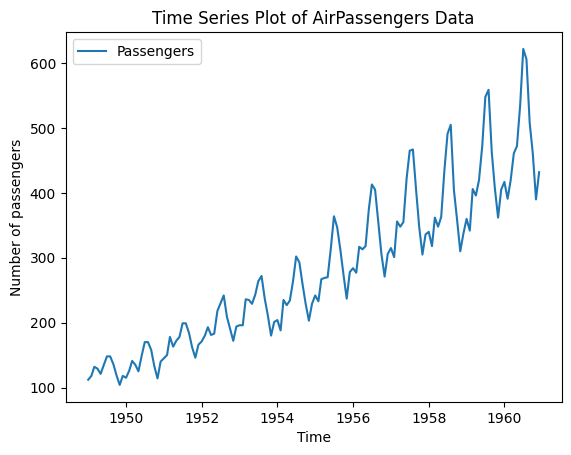

In [17]:
#Visualization of time series variable
import matplotlib.pyplot as plt
import seaborn as sns

#Generating a lineplot
sns.lineplot(df)

plt.title('Time Series Plot of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Number of passengers')



### Check for stationarity 
This refers tot the manner in which time series data changes is constant. A stationaity time series will not have any trends or seasonal pattern.

In [19]:
from statsmodels.tsa.stattools import adfuller

#Using ADF test method to check for stationarity
result = adfuller (df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


### Autocorrelation
This is a measure of how correlated time series data is at a given point in time with past values. If our passenger datat has strong autocorrelation, we can assume that high passenger numbers today, suggest a strong likelihood that they will be high tomorrow as well

In [22]:
#Autocorrelation in our passanger data for one month:
autocorrelation_lag1 = df['Passengers'].autocorr(lag =1)

#Display
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498522


In [27]:
#||For month 3,6 and 9..
autocorrelation_lag3 = df['Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167602


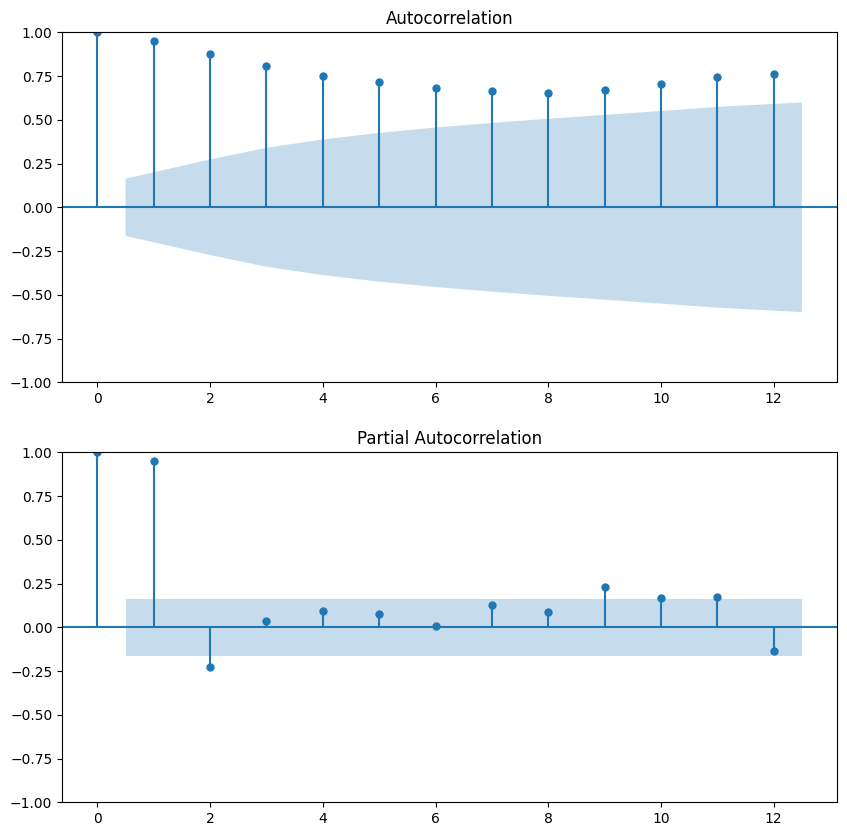

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#Plotting ACF and PCF
plt.figure(figsize=(10, 10))
plt.subplot(211)
plot_acf(df['Passengers'], lags=12, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Passengers'], lags=12, ax=plt.gca())
plt.show()

### Decomposition
We use **'seasonal_decompose'** from the statistics model to decompose the time series data into its seasonal, trend and residual components.<br>
The *additive* model was used since the seasonal variation is relatively constant over time. If the seasonal variation changes over time, the *multiplicative* model is used.

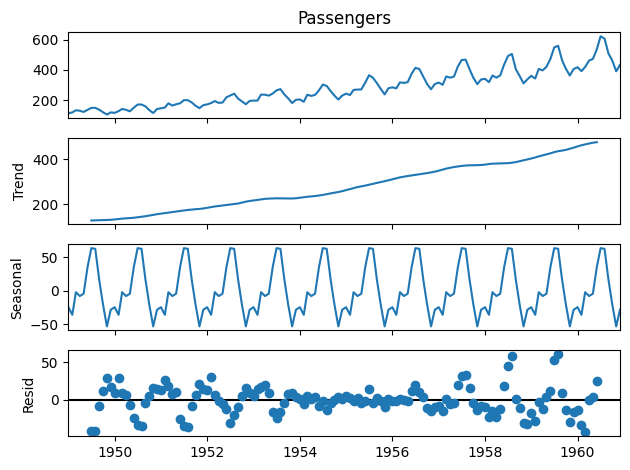

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Performing seasonal decomposition
decompose =seasonal_decompose(df['Passengers'], model = 'additive, period =12')

#Plotting the components
decompose.plot()
plt.show()

**Interpretation**: <br>
Analyzing and understanding the decomposition plot involves interpreting the indivual components.<br>

1. **Trend** <br>
The trend component represents the underlying long-term behavior or direction of the time series data. <br>
- It shows the overall pattern.<br>
- Shows any sustained upward or downward movements.<br>
If the trend is consistently increasing or decreasing, it suggests a clear upward or downward trend in the data. if the trend is flat, it indicates that there is no significant long-term trend present.<br>

2. **Seasonal** <br>
The seasonal component represents the repetitive patterns or fluctutation that occur at fixed intervals.<br>
- It shows the regular and predictable variations in the data that repeat over each seasonal period.<br>
- In the decompostion plot, the seasonal component is usually represented by a series of peaks and valleys.<br>
Seasonality refers to patterns that occur within a fixed freuency i.e daily, monthly or annual cycles. Understanding patterns can aid in prediction of future cycles and identifying any season-specific effects.<br>

3. **Residual**<br>
The residual component, also known as the *remainder* or *error term* represnets the random or unpredictable fluctutations in the data that are not accounted for by the trend and seasonal components.<br>
- It contains the noise or unexplained variation. <br>
- In the decomposition plot, the residual component is depcited as random fluctuations around zero.<br>
- Analyzing the residual component helps assess the quality of the decomposition.<br>
If the residuals exhibit a random pattern without any discernible trends or seasonality, it indicates that the decompostion is capturing most of the systematic variation in the data. Otherwise, if the residuals show patterns, it suggests that there might be additional patterns or factors not captured by the model.

##### Conclusion
- **Trend**: Upward trend.
- **Seasonality**: rise and fall in values each year.